In [83]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
# read data from csv file
df = pd.read_csv('../data/breast_cancer.csv')
df.head()

# drop the id column
df.drop('id', axis=1, inplace=True)

# drop the unnamed column
df.drop('Unnamed: 32', axis=1, inplace=True)

In [85]:
df_idx= pd.read_csv('../data/breast_cancer_train_indices.csv')
train_idx = df_idx['train_idx'].values

In [86]:
# replace the diagnosis column with 0 and 1
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [87]:
# split the data into X and y
# select radius_mean, texture_mean 
X = df[['radius_mean', 'texture_mean']].values
#X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values

In [88]:
# select train_idx from X and y
X_train = X[train_idx]
y_train = y[train_idx]

# select test_idx from X and y
test_idx = np.setdiff1d(np.arange(len(X)), train_idx)
X_test = X[test_idx]
y_test = y[test_idx]

In [89]:
# convert numpy array to torch tensor
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

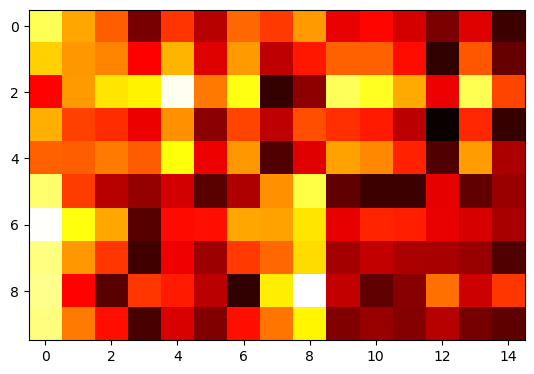

In [90]:
# compute the pairswise distance between X_train and X_test using torch.cdist
dist = torch.cdist(X_train[:10], X_test[:15])

# plot distance matrix colored by distance
plt.imshow(dist, cmap='hot')
# plot colorbar
#plt.colorbar()

In [91]:
import torch.nn as nn

# implement the Nadaraya-Watson kernel regression in PyTorch
class NW(nn.Module):
    def __init__(self, X_train, y_train, h=1, kernel=None):
        super().__init__()
        self.h = h
        self.X_train = X_train
        self.y_train = y_train
        if kernel is None:
            kernel = lambda x: torch.exp(-x**2 / (2 * h**2))
        self.kernel = kernel

    def forward(self, X_test):
        dist = torch.cdist(X_test, self.X_train)
        weights = self.kernel(dist)
        # return torch.sum(weights * self.y_train, dim=1) / torch.sum(weights, dim=1) 
        return (weights @ y_train) / (weights @ torch.ones_like(y_train))

In [92]:
# create a model instance and predict y_test
model = NW(X_train, y_train, h=1)
y_pred = model(X_test)

In [93]:
# How does the model perform?
# compute the accuracy
y_pred = (y_pred > 0.5).float()
acc = (y_pred == y_test).float().mean()
print(f'Accuracy: {acc:.2f}')

Accuracy: 0.89


<AxesSubplot: >

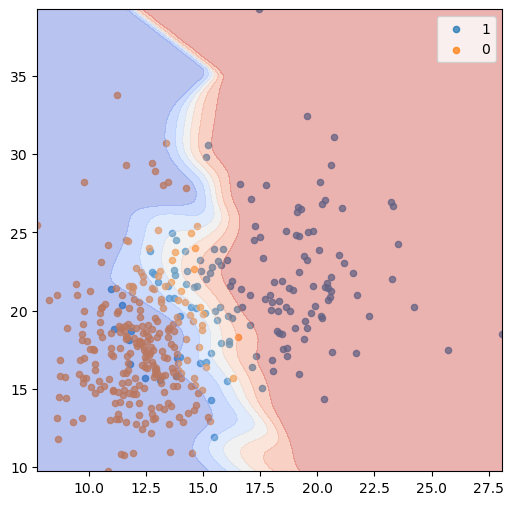

In [95]:
from helpers import *

# plot the decision boundary
plot_decision_bounary(model, X_train, y_train)

torch.Size([171, 398])


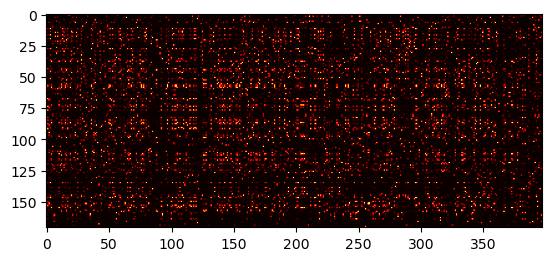

In [96]:
dist = torch.cdist(X_test, X_train)
weights = model.kernel(dist)
print(weights.shape)

# plot the weights
plt.imshow(weights, cmap='hot');